Imports

In [11]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix

Confusion Matrix

In [12]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(["Low", "Medium", "High"]))
    plt.xticks(tick_marks, ["Low", "Medium", "High"])
#     plt.yticks(tick_marks, [])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Load data

In [13]:
data = pd.read_csv("preprocessed_data.csv")

Split dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:34], data["class"], random_state=69, test_size=0.35)

Naive Bayes

In [15]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.75, penalty='l1', solver='liblinear',dual=False))),
        ('model', GaussianNB())])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [16]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.65      0.80      0.71       321
           1       0.85      0.67      0.75       724
           2       0.30      0.61      0.40        75

    accuracy                           0.70      1120
   macro avg       0.60      0.69      0.62      1120
weighted avg       0.76      0.70      0.72      1120



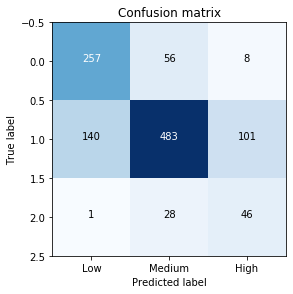

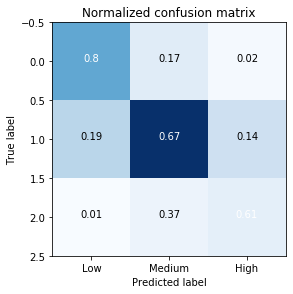

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()

SVM

In [18]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=1.5, penalty='l1',solver='liblinear', dual=False))),
        ('model', SVC(kernel='poly',coef0=3.0))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


In [19]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       321
           1       0.83      0.90      0.86       724
           2       0.74      0.31      0.43        75

    accuracy                           0.82      1120
   macro avg       0.78      0.65      0.69      1120
weighted avg       0.81      0.82      0.81      1120



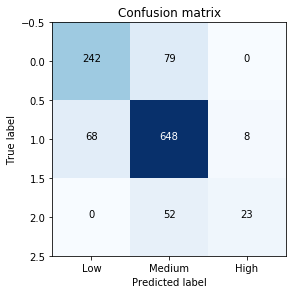

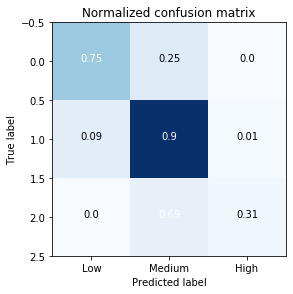

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()

Logistic Regression

In [21]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=1.5, penalty='l2',solver='saga',dual=False))),
        ('model', LogisticRegression(C=1.5,multi_class='ovr',class_weight='balanced',solver='liblinear'))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [22]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       321
           1       0.81      0.83      0.82       724
           2       0.39      0.21      0.28        75

    accuracy                           0.76      1120
   macro avg       0.64      0.59      0.61      1120
weighted avg       0.75      0.76      0.76      1120



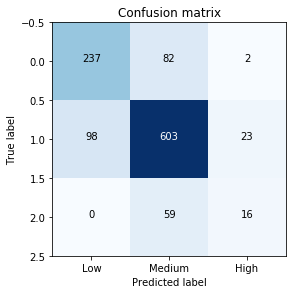

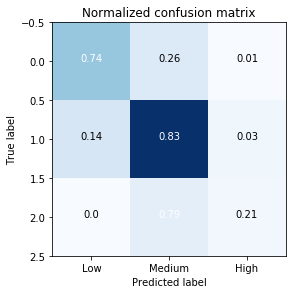

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()

Decision Tree

In [24]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=1.5, penalty='l1',solver='liblinear', dual=False))),
        ('model', DecisionTreeClassifier(criterion='entropy',min_samples_split=5))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold().split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


In [25]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       321
           1       0.83      0.82      0.82       724
           2       0.48      0.47      0.47        75

    accuracy                           0.77      1120
   macro avg       0.67      0.67      0.67      1120
weighted avg       0.77      0.77      0.77      1120



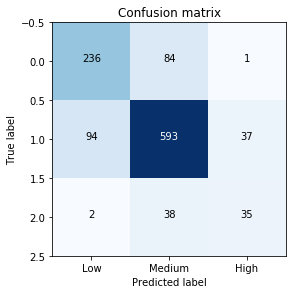

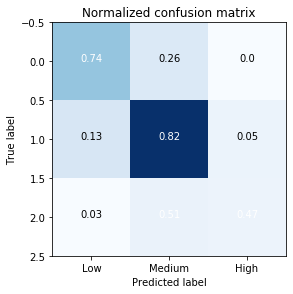

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()

Random Forest

In [27]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.5,penalty='l1',solver='liblinear', dual=False, max_iter=2000))),
        ('model', RandomForestClassifier(criterion='entropy', n_estimators=500,class_weight='balanced',random_state=42,min_samples_split=4,bootstrap=False))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   3.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ................................................. , total=   3.0s
[CV]  ................................................................
[CV] ................................................. , total=   3.0s
[CV]  ................................................................
[CV] ................................................. , total=   3.1s
[CV]  ................................................................
[CV] ................................................. , total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.3s finished


In [28]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       321
           1       0.87      0.94      0.90       724
           2       0.85      0.45      0.59        75

    accuracy                           0.87      1120
   macro avg       0.86      0.73      0.77      1120
weighted avg       0.87      0.87      0.86      1120



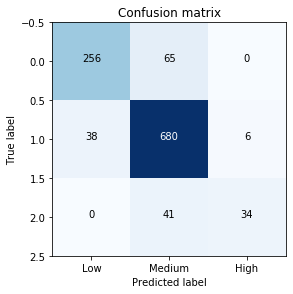

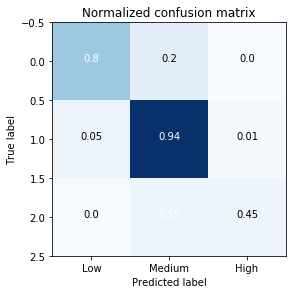

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()

Neural Network - Perceptron

In [30]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(C=0.75, penalty='l1',solver='liblinear', dual=False))),
        ('model', MLPClassifier(hidden_layer_sizes=(200,),max_iter=1000,learning_rate='adaptive'))])
param_grid = [{}] # Optionally add parameters here
grid_search = GridSearchCV(pipe, param_grid,cv=StratifiedKFold(n_splits=5).split(X_train, y_train), verbose=2)
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   7.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV] ................................................. , total=   8.5s
[CV]  ................................................................
[CV] ................................................. , total=   8.1s
[CV]  ................................................................
[CV] ................................................. , total=   6.5s
[CV]  ................................................................
[CV] ................................................. , total=   8.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.5s finished


In [31]:
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       321
           1       0.83      0.87      0.85       724
           2       0.57      0.36      0.44        75

    accuracy                           0.80      1120
   macro avg       0.73      0.66      0.68      1120
weighted avg       0.80      0.80      0.80      1120



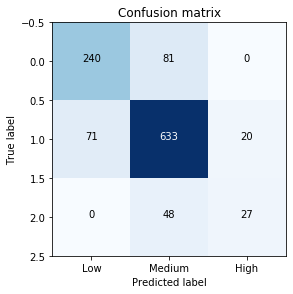

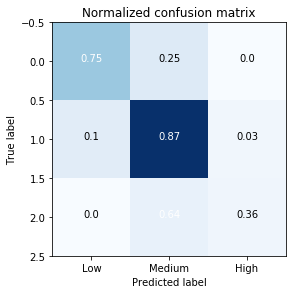

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()